In [1]:
import os
import glob

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [3]:
import torch

torch.cuda.is_available()

True

In [4]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 31.1 MB/s eta 0:00:00


In [5]:
from datasets import load_dataset
dataset = load_dataset('cnn_dailymail', '3.0.0')

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [7]:
train_data = dataset['train']
valid_data = dataset['validation']

In [8]:
column_names = train_data.features.keys()

In [9]:
column_names

dict_keys(['article', 'highlights', 'id'])

In [10]:
import pandas as pd


In [11]:
df_valid = pd.DataFrame(valid_data, columns=column_names)

In [12]:
df_train = pd.DataFrame(train_data,  columns=column_names)

In [13]:
df_train.shape

(287113, 3)

In [14]:
df_train.head()

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a


In [15]:
df_train.iloc[0,0]

'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Details o

In [16]:
df_train = df_train.drop(columns=['id'], axis=1).iloc[:1000] #We dont need the id


In [17]:
df_valid =  df_valid.drop(columns=['id'], axis=1).iloc[:300]

In [18]:
df_valid

,article,highlights
0,"(CNN)Share, and your gift will be multiplied. ...",Zully Broussard decided to give a kidney to a ...
1,"(CNN)On the 6th of April 1996, San Jose Clash ...",The 20th MLS season begins this weekend .\nLea...
2,"(CNN)French striker Bafetimbi Gomis, who has a...",Bafetimbi Gomis collapses within 10 minutes of...
3,(CNN)It was an act of frustration perhaps more...,Rory McIlroy throws club into water at WGC Cad...
4,(CNN)A Pennsylvania community is pulling toget...,"Cayman Naib, 13, hasn't been heard from since ..."
...,...,...
295,"(CNN)When Vladimir Putin reappears, he does it...",Putin attends concert in Red Square to celebra...
296,London (CNN)An 18-year-old British man has bee...,Metropolitan Police announce a media campaign ...
297,(CNN)There have been a few times in my career ...,CNN's Kelly Wallace wonders why women too ofte...
298,(CNN)Entertainers are paid for entertaining an...,Olympic 100m gold medal winner Sally Pearson s...


In [19]:
# Applying Lower Case to the text

In [20]:
df_train['article'] = df_train['article'].apply(lambda x: x.lower())
df_train['highlights'] = df_train['highlights'].apply(lambda x: x.lower())

df_valid['article'] = df_valid['article'].apply(lambda x: x.lower())
df_valid['highlights'] = df_valid['highlights'].apply(lambda x: x.lower())

In [21]:
#cleaning the data

In [22]:
import re
def data_cleaning(text):
   txt = re.sub(r'\((.*?)\)|/(\r\n|\n\r|\n.)/gm|\'?|--', "",text) #searches for anything inside () or any line breaks or any backslash and removes it.
   return txt

df_train['article'] = df_train['article'].apply(lambda x: data_cleaning(x))
df_train['highlights'] = df_train['highlights'].apply(lambda x: data_cleaning(x))


df_valid['article'] = df_valid['article'].apply(lambda x: data_cleaning(x))
df_valid['highlights'] = df_valid['highlights'].apply(lambda x: data_cleaning(x))



In [23]:
df_train

,article,highlights
0,"london, england harry potter star daniel rad...",harry potter star daniel radcliffe gets £20m f...
1,"editors note: in our behind the scenes series,...",mentally ill inmates in miami are housed on th...
2,"minneapolis, minnesota drivers who were on t...","new: ""i thought i was going to die,"" driver sa..."
3,washington doctors removed five small polyps...,"five small polyps found during procedure; ""non..."
4,the national football league has indefinite...,"new: nfl chief, atlanta falcons owner critical..."
...,...,...
995,the mother of murdered schoolboy damilola tayl...,mother of murdered schoolboy damilola taylor d...
996,washington a smiling pope benedict xvi arriv...,new: pope benedict xvi arrives in washington f...
997,eight florida teenagers six of them girls ...,eight florida teens to be tried as adults in v...
998,the following are excerpts from the heather ...,judge on heather mills: level of premarital we...


In [24]:
df_valid.head()

,article,highlights
0,"share, and your gift will be multiplied. that ...",zully broussard decided to give a kidney to a ...
1,"on the 6th of april 1996, san jose clash and d...",the 20th mls season begins this weekend .\nlea...
2,"french striker bafetimbi gomis, who has a hist...",bafetimbi gomis collapses within 10 minutes of...
3,it was an act of frustration perhaps more comm...,rory mcilroy throws club into water at wgc cad...
4,a pennsylvania community is pulling together t...,"cayman naib, 13, hasnt been heard from since w..."


In [25]:
# Tokenizing 

In [26]:
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer('spacy', language='en_core_web_sm')

In [27]:
print(tokenizer(df_train.iloc[0,1] + df_train.iloc[0,0]))

['harry', 'potter', 'star', 'daniel', 'radcliffe', 'gets', '£', '20', 'm', 'fortune', 'as', 'he', 'turns', '18', 'monday', '.', '\n', 'young', 'actor', 'says', 'he', 'has', 'no', 'plans', 'to', 'fritter', 'his', 'cash', 'away', '.', '\n', 'radcliffes', 'earnings', 'from', 'first', 'five', 'potter', 'films', 'have', 'been', 'held', 'in', 'trust', 'fund', '.london', ',', 'england', '  ', 'harry', 'potter', 'star', 'daniel', 'radcliffe', 'gains', 'access', 'to', 'a', 'reported', '£', '20', 'million', ' ', 'fortune', 'as', 'he', 'turns', '18', 'on', 'monday', ',', 'but', 'he', 'insists', 'the', 'money', 'wo', 'nt', 'cast', 'a', 'spell', 'on', 'him', '.', 'daniel', 'radcliffe', 'as', 'harry', 'potter', 'in', '"', 'harry', 'potter', 'and', 'the', 'order', 'of', 'the', 'phoenix', '"', 'to', 'the', 'disappointment', 'of', 'gossip', 'columnists', 'around', 'the', 'world', ',', 'the', 'young', 'actor', 'says', 'he', 'has', 'no', 'plans', 'to', 'fritter', 'his', 'cash', 'away', 'on', 'fast', 'car

In [28]:
def yield_tokens(data):
    
    for src, tgt in data.values: 
        yield tokenizer(src + tgt) 

In [29]:
# Define special symbols and indices
UNK_IDX, PAD_IDX, SOS_IDX, EOS_IDX = 0, 1, 2, 3
# Make sure the tokens are in order of their indices to properly insert them in vocab
special_symbols = ['<unk>', '<pad>', '<sos>', '<eos>']

In [30]:
from torchtext.vocab import build_vocab_from_iterator

vocab_transform  = build_vocab_from_iterator(yield_tokens(df_train), min_freq=2, special_first=True, specials=special_symbols) #takes 9minutes

In [31]:
vocab_transform.set_default_index(UNK_IDX)

In [32]:
len(vocab_transform)

19184

In [33]:
mapping = vocab_transform.get_itos()
mapping[200]

'case'

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [35]:
#Fasttext embedding

In [36]:
from torchtext.vocab import FastText
fast_vectors = FastText(language='simple') 

.vector_cache/wiki.simple.vec: 293MB [00:03, 91.3MB/s]                          
100%|██████████| 111051/111051 [00:09<00:00, 11940.53it/s]


In [37]:
fast_embedding = fast_vectors.get_vecs_by_tokens(vocab_transform.get_itos()).to(device)

In [38]:
fast_embedding.shape 

torch.Size([19184, 300])

In [39]:
#Creating Dataloaders

In [40]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset

BATCH_SIZE = 10

def sequencetial_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func


def tensor_transform(token_ids):
    return torch.cat((torch.tensor([SOS_IDX]),
                        torch.tensor(token_ids),
                        torch.tensor([EOS_IDX])))


text_transform = {}

text_transform = sequencetial_transforms(tokenizer,
                                           vocab_transform,
                                            tensor_transform )


def collate_batch(batch):
    src_batch, src_len_batch,  tgt_batch = [], [], [] 
    for src_sample, trg_sample in batch:
        processed_text = text_transform(src_sample.rstrip("\n"))
        src_batch.append(processed_text)
        tgt_batch.append(text_transform(trg_sample.rstrip("\n")))
        src_len_batch.append(processed_text.size(0))

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX)
    return src_batch, torch.tensor(src_len_batch, dtype=torch.int64), tgt_batch

In [41]:

class DataWrap(Dataset):

    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def __len__(self):
        return len(self.dataframe)
        
    def __getitem__(self, idx):
        return self.dataframe.iloc[idx]

In [42]:
train = DataWrap(df_train)
valid = DataWrap(df_valid)

In [43]:
batch_size = 10

train_loader = DataLoader(train, batch_size=batch_size,
                              shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(valid, batch_size=batch_size,
                              shuffle=True, collate_fn=collate_batch)

In [44]:
for src, _, tgt in train_loader:
    break

In [45]:
#Building Model

In [46]:
import torch.nn as nn
import torch.nn.functional as F
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, dropout):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, emb_dim)
        self.rnn = nn.GRU(emb_dim, hid_dim, bidirectional=True)
        self.fc = nn.Linear(hid_dim*2, hid_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src, src_len):
        embedded = self.dropout(self.embedding(src))

        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, src_len.to('cpu'), enforce_sorted=False)
        packed_outputs, hidden = self.rnn(packed_embedded)
        outputs, _ = nn.utils.rnn.pad_packed_sequence(packed_outputs)

        hidden = torch.tanh(self.fc(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)))

        return outputs, hidden
    

In [47]:

#Additive Attention 
class Attention(nn.Module):
    def __init__(self, hid_dim):
        super().__init__()

        self.v = nn.Linear(hid_dim, 1, bias = False)
        self.W = nn.Linear(hid_dim, hid_dim)
        self.U = nn.Linear(hid_dim*2, hid_dim)
    
    def forward(self, hidden, encoder_outputs, mask):
        batch_size = encoder_outputs.shape[1]
        src_len = encoder_outputs.shape[0]
        hidden = hidden.unsqueeze(1).repeat(1, src_len, 1)
        # print("Shape of the hidden:",hidden.shape)
        encoder_outputs = encoder_outputs.permute(1,0,2)
        # print("Shape of the encoder outputs", encoder_outputs.shape)
        energy = torch.tanh(self.W(hidden) + self.U(encoder_outputs))
        attention = self.v(energy).squeeze(2)
        attention = attention.masked_fill(mask, -1e10)
        # print(attention.shape)
        return F.softmax(attention, dim=1)


In [93]:
class DotAttention(nn.Module):
    def __init__(self, hid_dim, emb_dim):
        super().__init__()
        self.fc_key = nn.Linear(hid_dim*2, hid_dim)

        self.fc_out =  nn.Linear(hid_dim, 1)

        self.scale = 1 / torch.sqrt(torch.tensor(emb_dim))
        
    
    def forward(self, query, key, mask):
        src_len = key.shape[0] 
        
        query = query.unsqueeze(1) #b, 1, h
        key = self.fc_key(key.permute(1,0,2)) # b, s, h
        energy = torch.div(torch.matmul(key, query.permute(0,2,1)), self.scale).squeeze(2)
        
        attention = energy.masked_fill(mask, -1e10) 
        attention = F.softmax(attention, dim = -1) 

        return attention



In [94]:
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, dropout, attention):
        super().__init__()
        self.output_dim = output_dim
        self.attention = attention
        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.gru = nn.GRU((hid_dim * 2) + emb_dim, hid_dim)
        self.fc = nn.Linear((hid_dim * 2) + hid_dim + emb_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, encoder_outputs, mask):
        input = input.unsqueeze(0)
        embedded = self.dropout(self.embedding(input))
        # a = self.attention(hidden, encoder_outputs, mask)
        a = self.attention(hidden, encoder_outputs, mask)
        a = a.unsqueeze(1)
        encoder_outputs = encoder_outputs.permute(1, 0, 2)  #encoder_outputs = [batch size, src len, hid dim * 2]
        weighted = torch.bmm(a, encoder_outputs)
        weighted = weighted.permute(1, 0, 2)
        rnn_input = torch.cat((embedded, weighted), dim = 2)
        output, hidden = self.gru(rnn_input, hidden.unsqueeze(0))

        assert(output == hidden).all()
        embedded = embedded.squeeze(0)
        output = output.squeeze(0)
        weighted = weighted.squeeze(0)

        prediction = self.fc(torch.cat((output, weighted, embedded), dim = 1))

        return prediction, hidden.squeeze(0), a.squeeze(1)

In [95]:
import random
class Seq2SeqPackedAttention(nn.Module):
    def __init__(self, encoder, decoder, src_pad_idx, device):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.device = device

    def create_mask(self, src):
        mask = (src == self.src_pad_idx).permute(1, 0) 
        return mask
    
    def forward(self, src, src_len, teacher_forcing_ratio=0.5, max_length = 10, trg=None):
        
        batch_size = src.shape[1]
        sum_len = max_length #trg_len = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim

        outputs = torch.zeros(sum_len, batch_size,  trg_vocab_size).to(self.device)
        attentions = torch.zeros(sum_len, batch_size,  src.shape[0]).to(self.device)

        encoder_outputs, hidden = self.encoder(src, src_len) 
        
        if trg is not None:
          input_ = trg[0, :]
        else:
          input_ = torch.tensor([vocab_transform['<sos>'] ] * batch_size).to(device)
        mask = self.create_mask(src)
        for t in range(1, sum_len):
            output, hidden, attention = self.decoder(input_, hidden, encoder_outputs, mask)

            outputs[t] = output
            attentions[t] = attention
            teacher_force = random.random() < teacher_forcing_ratio

            top1 = output.argmax(1)
            if trg is not None: 
              input_ = trg[t] if teacher_force else top1
            else:
              input_ = top1

        return outputs, attentions






In [96]:
def initialize_weights(m):
    for name, param in m.named_parameters():
        if 'weight' in name:
            nn.init.normal_(param.data, mean=0, std=0.01)
        else:
            nn.init.constant_(param.data, 0)
            

In [97]:
# with torch.no_grad():
#     torch.cuda.empty_cache()
 

In [98]:
input_dim = len(vocab_transform)
output_dim = len(vocab_transform)
emb_dim = 267
hid_dim = 512
dropout = 0.5
SRC_PAD_IDX = PAD_IDX
attn = DotAttention(hid_dim, emb_dim)
# attn = Attention(hid_dim)
enc  = Encoder(input_dim,  emb_dim,  hid_dim, dropout)
dec  = Decoder(output_dim, emb_dim,  hid_dim, dropout, attn)

#Applying FastText embedding to the Encoder and the Decoder
# enc.embedding.weight.data = fast_embedding 
# dec.embedding.weight.data = fast_embedding 

model = Seq2SeqPackedAttention(enc, dec, SRC_PAD_IDX, device).to(device)
model.apply(initialize_weights)

Seq2SeqPackedAttention(
  (encoder): Encoder(
    (embedding): Embedding(19184, 267)
    (rnn): GRU(267, 512, bidirectional=True)
    (fc): Linear(in_features=1024, out_features=512, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (attention): DotAttention(
      (fc_key): Linear(in_features=1024, out_features=512, bias=True)
      (fc_out): Linear(in_features=512, out_features=1, bias=True)
    )
    (embedding): Embedding(19184, 267)
    (gru): GRU(1291, 512)
    (fc): Linear(in_features=1803, out_features=19184, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [99]:
#we can print the complexity by the number of parameters
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

5122128
410112
786432
  1536
  1536
410112
786432
  1536
  1536
524288
   512
524288
   512
   512
     1
5122128
1982976
786432
  1536
  1536
34588752
 19184
______
51074017


In [100]:
import torch.optim as optim

lr = 0.001

#training hyperparameters
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss(ignore_index = PAD_IDX) #combine softmax with cross entropy

In [101]:
torch.cuda.is_available()

True

In [102]:
def train(model, loader, optimizer, criterion, clip, loader_length):
    
    model.train()
    epoch_loss = 0
    
    for src, src_length, trg in loader:
        
        src = src.to(device)
        trg = trg.to(device)
        
        optimizer.zero_grad()
        
        output, attentions = model(src, src_length, max_length = trg.shape[0], trg=trg)
        
        #trg    = [trg len, batch size]
        #output = [trg len, batch size, output dim]
        output_dim = output.shape[-1]
        
        #the loss function only works on 2d inputs with 1d targets thus we need to flatten each of them
        output = output[1:].view(-1, output_dim)
        trg    = trg[1:].view(-1)
        #trg    = [(trg len - 1) * batch size]
        #output = [(trg len - 1) * batch size, output dim] 
        loss = criterion(output, trg[:])
        
        loss.backward()
        
        #clip the gradients to prevent them from exploding (a common issue in RNNs)
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        
    return epoch_loss / loader_length

In [103]:
def evaluate(model, loader, criterion, loader_length):
        
    #turn off dropout (and batch norm if used)
    model.eval()
    
    epoch_loss = 0
    
    with torch.no_grad():
    
        for src, src_length, trg in loader:
        
            src = src.to(device)
            trg = trg.to(device)

            output, attentions = model(src, src_length, max_length = trg.shape[0], trg=trg, teacher_forcing_ratio = 0) #turn off teacher forcing

            #trg    = [trg len, batch size]
            #output = [trg len, batch size, output dim]

            output_dim = output.shape[-1]
            
            output = output[1:].view(-1, output_dim)
            trg = trg[1:].view(-1)

            #trg    = [(trg len - 1) * batch size]
            #output = [(trg len - 1) * batch size, output dim]

            loss = criterion(output, trg)
            
            epoch_loss += loss.item()
        
    return epoch_loss / loader_length

In [104]:

train_loader_length = len(list(iter(train_loader))) 
valid_loader_length = len(list(iter(valid_loader))) 

In [105]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [106]:
import time
import math
best_valid_loss = float('inf')
num_epochs = 10
clip       = 1

# save_path = f'models/{model.__class__.__name__}.pt'

train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    
    start_time = time.time()

    train_loss = train(model, train_loader, optimizer, criterion, clip, train_loader_length)
    valid_loss = evaluate(model, valid_loader, criterion, valid_loader_length)
    
    #for plotting
    train_losses.append(train_loss) 
    valid_losses.append(valid_loss)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

     
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}') 
    print(f'\Validation Loss: {valid_loss:.3f} | Valid PPL: {math.exp(valid_loss):7.3f}') 
    #lower perplexity is better

Epoch: 01 | Time: 2m 22s
	Train Loss: 7.831 | Train PPL: 2518.653
\Validation Loss: 6.978 | Valid PPL: 1073.270
Epoch: 02 | Time: 2m 20s
	Train Loss: 6.823 | Train PPL: 918.624
\Validation Loss: 6.980 | Valid PPL: 1074.803
Epoch: 03 | Time: 2m 21s
	Train Loss: 6.641 | Train PPL: 766.014
\Validation Loss: 7.036 | Valid PPL: 1136.805
Epoch: 04 | Time: 2m 20s
	Train Loss: 6.491 | Train PPL: 658.985
\Validation Loss: 7.024 | Valid PPL: 1122.811
Epoch: 05 | Time: 2m 20s
	Train Loss: 6.377 | Train PPL: 588.156
\Validation Loss: 7.164 | Valid PPL: 1292.261
Epoch: 06 | Time: 2m 20s
	Train Loss: 6.208 | Train PPL: 496.740
\Validation Loss: 7.270 | Valid PPL: 1435.899
Epoch: 07 | Time: 2m 21s
	Train Loss: 6.032 | Train PPL: 416.610
\Validation Loss: 7.295 | Valid PPL: 1472.889
Epoch: 08 | Time: 2m 20s
	Train Loss: 5.888 | Train PPL: 360.656
\Validation Loss: 7.423 | Valid PPL: 1673.914
Epoch: 09 | Time: 2m 20s
	Train Loss: 5.687 | Train PPL: 294.993
\Validation Loss: 7.521 | Valid PPL: 1846.778


In [107]:
#plotting the losses

Text(0, 0.5, 'loss')

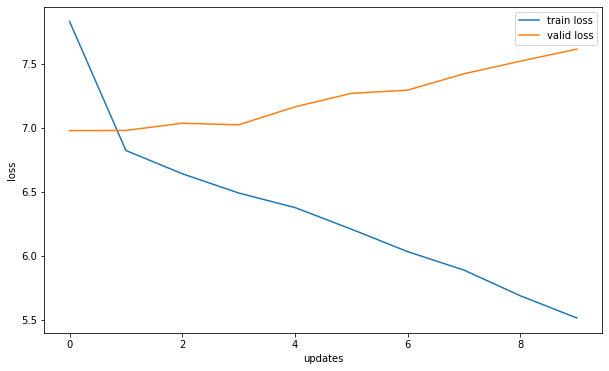

In [108]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(train_losses, label = 'train loss')
ax.plot(valid_losses, label = 'valid loss')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('loss')

In [109]:
max_len = 10
sample = "Mrs Kopta, who has dementia, has been living in a nursing home after she was taken in as a person in need seven years after she disappeared. It's a relief she hasn't been murdered. Her husband Bob Kopta said he had been married to Mrs Kopta for 20 years before she went missing. He said: It's a relief knowing that she's not laying in a ditch somewhere, or murdered somewhere. The 86-year-old added that his family suspected she may be in Puerto Rico but she was declared dead around 25 years ago. The retired electrician also said he had consulted with a psychic about her whereabouts. Mrs Kopta has two sisters - a twin, who died six years ago, and a younger sister who was relieved to learn she's still alive, Mr Kopta added. He said he has experienced a range of emotions over the years but is content knowing his wife is alive and being cared for. After 30 years, you try to forget about it. Now I can forget about it. We know what happened, and she is taken care of now, he said."

In [110]:
sample

"Mrs Kopta, who has dementia, has been living in a nursing home after she was taken in as a person in need seven years after she disappeared. It's a relief she hasn't been murdered. Her husband Bob Kopta said he had been married to Mrs Kopta for 20 years before she went missing. He said: It's a relief knowing that she's not laying in a ditch somewhere, or murdered somewhere. The 86-year-old added that his family suspected she may be in Puerto Rico but she was declared dead around 25 years ago. The retired electrician also said he had consulted with a psychic about her whereabouts. Mrs Kopta has two sisters - a twin, who died six years ago, and a younger sister who was relieved to learn she's still alive, Mr Kopta added. He said he has experienced a range of emotions over the years but is content knowing his wife is alive and being cared for. After 30 years, you try to forget about it. Now I can forget about it. We know what happened, and she is taken care of now, he said."

In [111]:
sample = sample.lower()

In [112]:
sample = data_cleaning(sample)

In [113]:
src_txt = text_transform(sample).to(device)

In [114]:
sample

'mrs kopta, who has dementia, has been living in a nursing home after she was taken in as a person in need seven years after she disappeared. its a relief she hasnt been murdered. her husband bob kopta said he had been married to mrs kopta for 20 years before she went missing. he said: its a relief knowing that shes not laying in a ditch somewhere, or murdered somewhere. the 86-year-old added that his family suspected she may be in puerto rico but she was declared dead around 25 years ago. the retired electrician also said he had consulted with a psychic about her whereabouts. mrs kopta has two sisters - a twin, who died six years ago, and a younger sister who was relieved to learn shes still alive, mr kopta added. he said he has experienced a range of emotions over the years but is content knowing his wife is alive and being cared for. after 30 years, you try to forget about it. now i can forget about it. we know what happened, and she is taken care of now, he said.'

In [115]:
src_txt

tensor([    2,  5990,     0,     6,    43,    33,     0,     6,    33,    49,
          518,    12,    10, 13428,   130,    52,    41,    17,   306,    12,
           25,    10,   450,    12,   263,   501,    92,    52,    41,  3053,
            5,    47,    10,  1581,    41,    33,    55,    49,  4704,     5,
           42,   512,  2389,     0,    14,    20,    45,    49,  1287,     7,
         5990,     0,    16,   366,    92,   113,    41,   342,   916,     5,
           20,    14,    46,    47,    10,  1581,  3289,    15,    41,    89,
           36,  5211,    12,    10, 15752,  5021,     6,    57,  4704,  5021,
            5,     4,  7295,    13,    73,    13,   143,   359,    15,    26,
          149,   981,    41,   144,    35,    12,  7805, 11394,    37,    41,
           17,  1025,   570,   213,   680,    92,   299,     5,     4,  2157,
            0,    64,    14,    20,    45,  9204,    21,    10,     0,    48,
           42,  8919,     5,  5990,     0,    33,    60,  4753, 

In [116]:
text_length = torch.tensor([src_txt.size(0)]).to(device)

In [117]:
src_txt = src_txt.reshape(-1, 1).to(device)
model = model.to(device)

In [118]:
model.eval()
with torch.no_grad():
  output, attentions = model(src_txt, text_length,  teacher_forcing_ratio=0, max_length=20)

In [119]:
output.shape

torch.Size([20, 1, 19184])

In [120]:
output = output.squeeze(1)

In [121]:
output.shape

torch.Size([20, 19184])

In [122]:
output

tensor([[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  4.5993,  -8.4070,  -8.5353,  ...,  -8.3319,  -8.3504,  -8.2446],
        [  4.0560,  -9.3334,  -9.4017,  ...,  -9.5263,  -9.4370,  -9.0106],
        ...,
        [  2.9608, -10.9143, -10.9290,  ..., -11.0730, -10.9598, -10.6938],
        [  3.0587, -10.2218, -10.1557,  ..., -10.3196, -10.3428, -10.0051],
        [  3.2311,  -9.8312,  -9.9251,  ..., -10.1429, -10.1583,  -9.6331]],
       device='cuda:0')

In [123]:
output_max = -output.argmax(1)

In [124]:
output_max

tensor([   0,  -84, -175,  -65,  -20,  -65,   -7,   -7,   -7,   -6,   -6,   -5,
         -31,   -5,  -31,  -31,  -31,   -7,  -35,   -7], device='cuda:0')

In [125]:
for token in output_max:
    print(mapping[token.item()])

<unk>
womack
visitor
writer.english
zan
writer.english
zoning
zoning
zoning
zoysia
zoysia
zsls
yuma
zsls
yuma
yuma
yuma
zoning
youzhny
zoning


In [126]:
output_sort = (-output).argsort(1)


In [127]:
output_sort.shape

torch.Size([20, 19184])

In [128]:
k = 4
out = output_sort[:, :k].reshape(k, -1)

In [129]:

for i in out:
  sent = ""
  for token in i:
    sent = sent + " " +  mapping[token.item()]
  print(sent)

 <unk> <pad> <sos> <eos> president new police bill bush : of says says : to , he to 440 ,
 says has was s to he , as to , of " to , of " , to of in
 , . in to . " , in 
 . , in . 
 " the 
 . says ,
 
 . the to 
 to . , to , the of be to have the to in , a
